## Context#### 
TechCorner Mobile Sales & Customer Insights is a real-world dataset capturing 10 months of mobile phone sales transactions from a retail shop in Bangladesh. This dataset was designed to analyze customer location, buying behavior, and the impact of Facebook marketing efforts.

The primary goal was to identify whether customers are from the local area (Rangamati Sadar, Inside Rangamati) or completely outside Rangamati. Since TechCorner operates a Facebook page, the dataset also includes insights into whether Facebook marketing is effectively reaching potential buyerng buyer

In [185]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#import dataset
df = pd.read_csv("TechCorner_Sales_update.csv")

In [7]:
df.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cus.ID                                8871 non-null   int64  
 1   Date                                  8871 non-null   object 
 2   Cus. Location                         8871 non-null   object 
 3   Age                                   8871 non-null   int64  
 4   Gender                                8871 non-null   object 
 5   Mobile Name                           8871 non-null   object 
 6   Sell Price                            8871 non-null   float64
 7   Does he/she Come from Facebook Page?  8871 non-null   object 
 8   Does he/she Followed Our Page?        8871 non-null   object 
 9   Did he/she buy any mobile before?     8871 non-null   object 
 10  Did he/she hear of our shop before?   8871 non-null   object 
dtypes: float64(1), in

,Cus.ID,Age,Sell Price
count,8871.000000,8871.000000,8871.00000
mean,4436.000000,34.047007,25068.38654
std,2560.981452,9.592612,18032.80271
min,1.000000,18.000000,12702.00000
25%,2218.500000,26.000000,17466.50000
50%,4436.000000,34.000000,21682.00000
75%,6653.500000,42.000000,25777.50000
max,8871.000000,50.000000,200465.00000


## Plot histograms


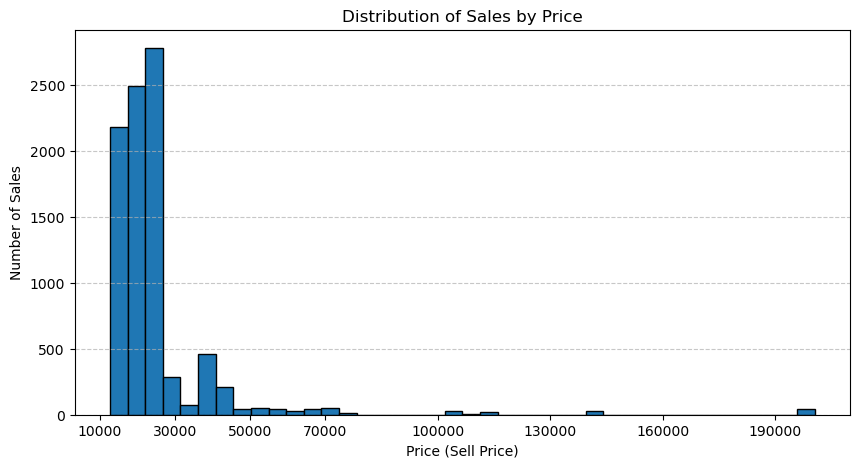

In [156]:
plt.figure(figsize=(10, 5))
plt.hist(df["Sell Price"], bins=40, edgecolor="black")
plt.xlabel("Price (Sell Price)")
xticks = np.concatenate([np.arange(10000, 70000, 20000), np.arange(70000, 200000, 30000)])
plt.xticks(xticks)
plt.ylabel("Number of Sales")
plt.title("Distribution of Sales by Price")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

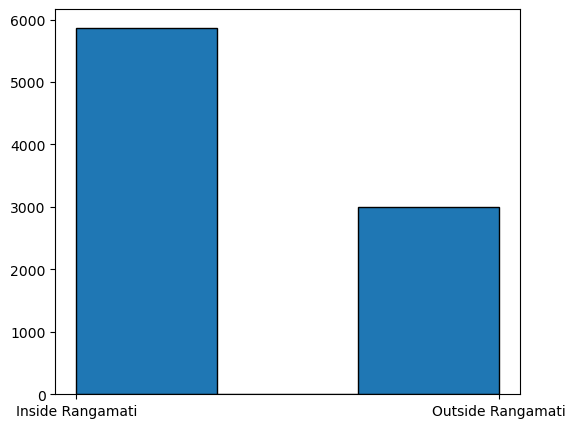

In [158]:
df["Cus. Location"] = df["Cus. Location"].replace(["Rangamati Sadar", "Inside Rangamati"], "Inside Rangamati")
plt.figure(figsize=(6, 5))
plt.hist(df["Cus. Location"], bins= 3, edgecolor="black")
plt.show()

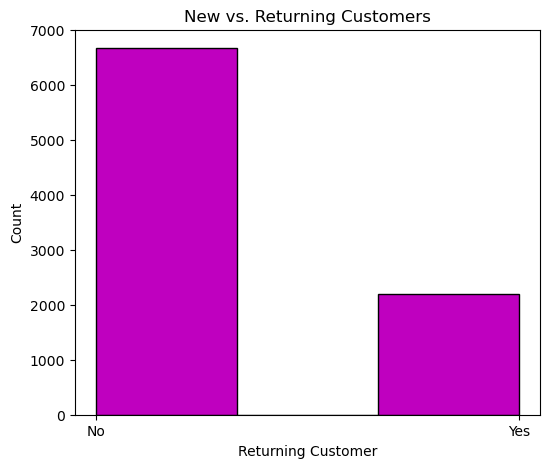

In [144]:

plt.figure(figsize=(6, 5))
plt.hist(df["Did he/she buy any mobile before?"], bins = 3, edgecolor="black", color = "m")
plt.title("New vs. Returning Customers")
plt.xlabel("Returning Customer")
plt.ylabel("Count")
plt.show()

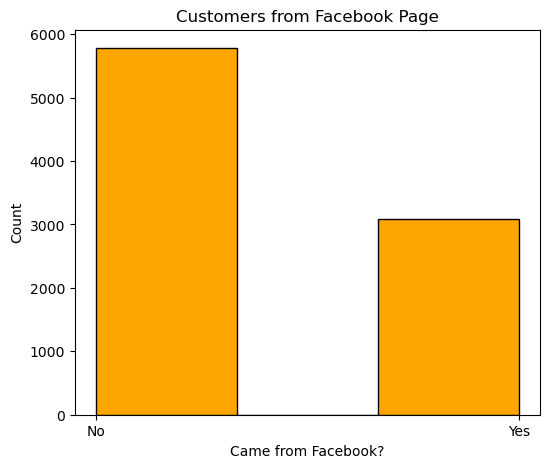

In [126]:
plt.figure(figsize=(6, 5))
plt.hist(df["Does he/she Come from Facebook Page?"], bins = 3, edgecolor="black", color="orange")
plt.title("Customers from Facebook Page")
plt.xlabel("Came from Facebook?")
plt.ylabel("Count")
plt.show()

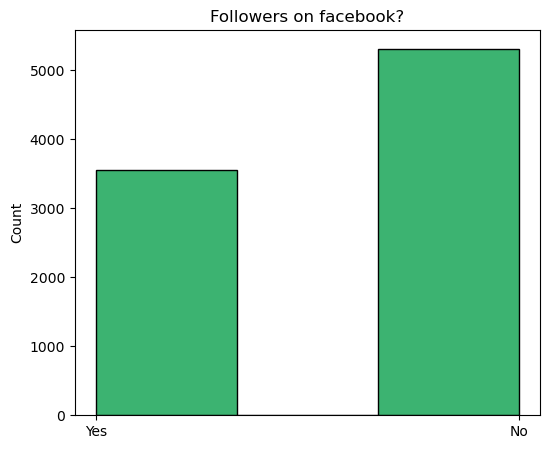

In [148]:

plt.figure(figsize=(6, 5))
plt.hist(df["Does he/she Followed Our Page?"], bins = 3, edgecolor="black", color="mediumseagreen")
plt.title("Followers on facebook?")
plt.ylabel("Count")
plt.show()

## Predict sales prices

We will try to predict sale prices based on customer's age using **Random Forest Regression**

In [183]:
dataset = df[["Age", "Sell Price"]].dropna()

X = dataset.drop(columns=["Sell Price"])
y = dataset["Sell Price"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fit
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

# Make Predictions
y_pred = model.predict(X_test)



print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: -0.0004140486435830759
MAE: 8474.358183749735


## Predict sales prices

We will try to predict sale prices based on customer's age using **Linear Regression**

In [194]:
dataset = df[["Age", "Sell Price"]].dropna()
X = dataset.drop(columns=["Sell Price"])
y = dataset["Sell Price"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fit
model = LinearRegression()
model.fit(X_train,y_train)

# Make Predictions
y_pred = model.predict(X_test)



print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: -0.00011711097142907967
MAE: 8434.687805302357
